In [3]:
import json, shapely, fiona, os
import seaborn as sns
import pandas as pd
import geopandas as gpd
import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
hydro = gpd.read_file('data/HydrologyLine.shp')
hydro.columns = ['layer','length','geometry']
hydro.head(1)

,layer,length,geometry
0,LATERAL,675.354924,LINESTRING (3093363.249963984 1260871.99988813...


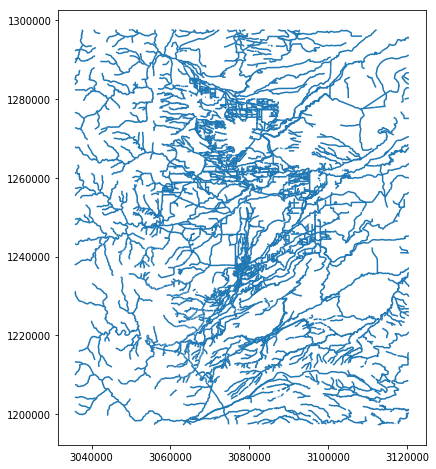

In [7]:
hydro.plot(figsize=(15,8))

In [10]:
hydro.crs

{'init': 'epsg:2876'}

# Crime?

In [11]:
crime = gpd.read_file('data/Target_Crime_Locations.shp')
crime['date'] = crime.REPORTDATE.apply(lambda x: pd.Timestamp(x).date())
crime['year'] = crime.date.apply(lambda x: x.year)
crime.head()

,OBJECTID,REPORTNUM,REPORTDATE,BLOCKADD,OFFENSE,geometry,date,year
0,14950943,100005879,2010-05-10T07:00:00.000Z,19th St & Iris Ave,Vandalism,POINT (-105.2726935563568 40.03641117906543),2010-05-10,2010
1,14950944,080016839,2008-12-15T07:00:00.000Z,2900 Block Glenwood Dr,Burglary,POINT (-105.2551157859522 40.03282370060626),2008-12-15,2008
2,14950945,170003203,2017-03-16T07:00:00.000Z,1900 Block 29th St,Sex Assault,POINT (-105.2562485089662 40.01971060892392),2017-03-16,2017
3,14950946,120006765,2012-05-19T07:00:00.000Z,800 Block 11th St,Robbery,POINT (-105.2786508425686 40.00278002872848),2012-05-19,2012
4,14950947,080007937,2008-06-14T07:00:00.000Z,900 Block 30th St,Vandalism,POINT (-105.253104060112 40.00445429499652),2008-06-14,2008


In [105]:
crimes_on_osmplands = gpd.sjoin(osmp_lands.to_crs(crime.crs),crime) #Spatial join Points to polygons
crimes_on_osmplands.head(2)

,AcqID,PropertyID,TYPE,NAME,YEARCLOSE,JOINTPURCH,PUBLICACCE,lbl_Acres,Acres,Manager,...,Shape_len,geometry,index_right,OBJECTID,REPORTNUM,REPORTDATE,BLOCKADD,OFFENSE,date,year
53,73,1526,Fee Property,GREENS INDUSTRIAL PARK,1979,n,y,5,5.437651,OSMP,...,5209.42008,"POLYGON ((-105.201588050469 40.07617338188011,...",9217,14960160,080002654,2008-02-28T07:00:00.000Z,6700 Block Lookout Rd,Vandalism,2008-02-28,2008
53,73,1526,Fee Property,GREENS INDUSTRIAL PARK,1979,n,y,5,5.437651,OSMP,...,5209.42008,"POLYGON ((-105.201588050469 40.07617338188011,...",18026,14967969,140010564,2014-08-22T07:00:00.000Z,6700 Block Lookout Rd,Burglary,2014-08-22,2014


In [108]:
# What crimes happpen on OSMP lands?
crimes_on_osmplands.OFFENSE.value_counts()

Vandalism             10
Theft From Vehicle     9
Burglary               5
Trespassing            1
Recovery               1
Homicide               1
Sex Assault            1
Auto Theft             1
Robbery                1
Name: OFFENSE, dtype: int64

<br><br><hr><br><br>
# Crimes Near Water?

In [18]:
hydro_polies = hydro.buffer(100).to_crs(crime.crs)

In [19]:
crimes_near_water = gpd.sjoin(hydro_polies, crime)

AttributeError: 'GeoSeries' object has no attribute 'columns'

In [82]:
prairie = gpd.read_file('data/prairies.shp')
print("Found {0} colonies".format(len(prairie)))
prairie.head()

Found 1939 colonies


,PD_ID,Comment,Year,Name,Acres,Hectares,Plague,Manager,Perimeter,Activity,YearAcquir,sdeWildlif,Shape_area,Shape_len,geometry
0,126.0,None,2009.0,Brewbaker,30.013797,12.146153,None,OSMP,17407.132776,2.0,1996,1.307396e+06,1.307396e+06,17407.132776,(POLYGON ((-105.2551049746035 40.1107786117787...
1,26.0,None,2009.0,Cowles,5.450247,2.205637,None,OSMP,2875.475502,2.0,1991,2.374118e+05,2.374118e+05,2875.475502,POLYGON ((-105.2125947902807 40.09369161960398...
2,136.0,None,2009.0,Sams Lane/Van Vleet - west,6.346785,2.568453,None,OSMP,4246.332172,2.0,1978,2.764648e+05,2.764648e+05,4246.332172,(POLYGON ((-105.2230299787233 39.9701249045225...
3,68.0,None,2009.0,Marshall,47.677422,19.294368,None,OSMP,10818.604923,2.0,1997,2.076820e+06,2.076820e+06,10818.604923,(POLYGON ((-105.1853971869327 39.9896294967005...
4,38.0,None,2009.0,ERNI- Moore,16.960038,6.863484,None,OSMP,5580.871249,2.0,1967,7.387763e+05,7.387763e+05,5580.871249,"POLYGON ((-105.293482928868 40.05715147484449,..."


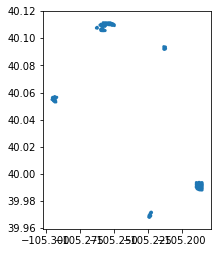

In [93]:
prairie.head().buffer(0.001).plot()

In [84]:
# What types of crimes are happening near Prairie Dog Colonies?

In [94]:
dfsjoin = gpd.sjoin(prairie.head().buffer(0.001),crime) #Spatial join Points to polygons
# dfpivot = pd.pivot_table(df,index='PolyID',columns='Food',aggfunc={'Food':len})
# dfpivot.columns = dfpivot.columns.droplevel()
dfsjoin.head()

AttributeError: 'GeoSeries' object has no attribute 'columns'

# Buildings?

In [62]:
buildings = gpd.read_file('data/City_of_Boulder_3D_Building_Roof.shp')
buildings.head()

,SHAPE_Leng,SHAPE_Area,geometry
0,276.733879,1283.289195,POLYGON Z ((3067346.804077148 1250305.19012451...
1,141.548510,1142.715408,POLYGON Z ((3067204.612121582 1250220.16510009...
2,228.668139,2777.803745,POLYGON Z ((3067269.380126953 1250210.63708496...
3,89.365014,371.281768,POLYGON Z ((3067140.653076172 1250031.60510253...
4,266.608016,4013.144088,POLYGON Z ((3067345.287109375 1250380.65411377...


In [63]:
buildings.crs

{'init': 'epsg:2876'}

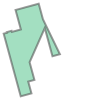

In [79]:
buildings.iloc[413].geometry